<a href="https://colab.research.google.com/github/picklehari/Babylon_Glutton/blob/master/Transcript_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [0]:
#!git clone https://github.com/corralm/TEDscraper

In [0]:
import scipy
import pandas
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import numpy 
import ast
from fastai.text import *
from textblob import TextBlob
import nltk
from collections import Counter
import operator

In [0]:
nltk.download("punkt")
nltk.download("brown")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

# Data Analysis

In [0]:
ted_talks = pandas.read_csv("/content/ted_talks.csv")

In [0]:
ted_talks_tech = ted_talks[ted_talks.topics.str.lower().str.contains('technology')]

In [0]:
ted_talks_tech.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},"{0: ""Nobel Laureate Al Gore focused the world'...",3533197,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",273.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1927544,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",125.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
10,58,My wish: Help me stop pandemics,Larry Brilliant,{0: 'Larry Brilliant'},"{0: ['epidemiologist', 'philanthropist']}","{0: ""TED Prize winner Larry Brilliant has spen...",1311708,2006-02-23,2006-07-25,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",87.0,1550,"['TED Prize', 'collaboration', 'disease', 'ebo...","{1153: ""How we'll stop polio for good"", 869: '...",https://www.ted.com/talks/larry_brilliant_my_w...,"Accepting the 2006 TED Prize, Dr. Larry Brilli...",I'm the luckiest guy in the world. I got to se...
12,41,One Laptop per Child,Nicholas Negroponte,{0: 'Nicholas Negroponte'},{0: ['tech visionary']},"{0: ""The founder of the MIT Media Lab, Nichola...",475020,2006-02-23,2006-08-01,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fr', 'he...",103.0,1057,"['children', 'design', 'education', 'entrepren...","{2043: 'A 30-year history of the future', 255:...",https://www.ted.com/talks/nicholas_negroponte_...,"Nicholas Negroponte, founder of the MIT Media ...",I've been at MIT for 44 years. I went to TED I...
13,65,The radical promise of the multi-touch interface,Jeff Han,{0: 'Jeff Han'},{0: ['human-computer interface designer']},{0: 'After years of research on touch-driven c...,4802858,2006-02-06,2006-08-01,TED2006,en,"['ar', 'bg', 'cs', 'de', 'en', 'es', 'fa', 'fr...",242.0,527,"['demo', 'design', 'interface design', 'techno...",{685: 'The thrilling potential of SixthSense t...,https://www.ted.com/talks/jeff_han_the_radical...,"Jeff Han shows off a cheap, scalable multi-tou...",I'm really excited to be here today. I'll show...


In [0]:
ted_talks_tech.describe()

,talk_id,views,comments,duration
count,989.000000,9.890000e+02,912.000000,989.000000
mean,9610.611729,1.831321e+06,145.138158,766.022245
std,16315.667045,2.682171e+06,173.848732,368.322098
min,1.000000,0.000000e+00,3.000000,172.000000
25%,862.000000,8.365780e+05,48.000000,480.000000
50%,1745.000000,1.317993e+06,95.000000,754.000000
75%,5458.000000,1.908259e+06,184.250000,996.000000
max,63812.000000,5.932668e+07,2530.000000,3760.000000


In [0]:
tech_talks_description = ted_talks_tech.description

In [0]:
vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
vectors = vectorizer.fit_transform(tech_talks_description).todense()

In [0]:
vectors.shape

(989, 8772)

In [0]:
vectors

matrix([[0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.271791, ..., 0.      , 0.      , 0.      , 0.      ],
        ...,
        [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      , 0.      ]])

In [0]:
vocab = vectorizer.get_feature_names()

In [0]:
vocab

['000',
 '08',
 '10',
 '100',
 '100mph',
 '10x',
 '11',
 '11th',
 '12',
 '123',
 '123456',
 '125',
 '13',
 '132',
 '135',
 '14',
 '15',
 '150',
 '16th',
 '17',
 '170',
 '17th',
 '18',
 '1812',
 '1830s',
 '1849',
 '1858',
 '1884',
 '1895',
 '19',
 '1930s',
 '1948',
 '195',
 '1953',
 '1956',
 '1957',
 '1959',
 '1960s',
 '1968',
 '1969',
 '1970s',
 '1980s',
 '1990',
 '1997',
 '1998',
 '20',
 '200',
 '2002',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2020s',
 '2040',
 '2045',
 '2050',
 '2060',
 '20th',
 '21',
 '21st',
 '22',
 '235',
 '24',
 '240',
 '25',
 '26',
 '27',
 '280',
 '2d',
 '30',
 '300',
 '30s',
 '32',
 '35',
 '360',
 '3d',
 '3rd',
 '40',
 '400',
 '404',
 '4d',
 '50',
 '500',
 '50x15',
 '522',
 '54',
 '55',
 '60',
 '67p',
 '70',
 '706',
 '71',
 '80',
 '800',
 '830',
 '8462852',
 '85',
 '875',
 '90',
 '98',
 '99',
 'aaron',
 'aaswath',
 'abandoned',
 'abdo',
 'abe',
 'ab

In [0]:
tfidf_value = vectors.tolist()

In [0]:
tf_idf_df = pandas.DataFrame(tfidf_value,columns=vocab)

In [0]:
tf_idf_df = tf_idf_df.transpose()

In [0]:
tf_idf_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988
count,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,...,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000
mean,0.000536,0.000522,0.000469,0.000398,0.000448,0.000477,0.000544,0.000501,0.000417,0.000445,0.000537,0.000480,0.000520,0.000463,0.000446,0.000424,0.000526,0.000520,0.000458,0.000452,0.000395,0.000495,0.000465,0.000468,0.000443,0.000449,0.000447,0.000546,0.000451,0.000520,0.000461,0.000450,0.000489,0.000526,0.000497,0.000535,0.000472,0.000516,0.000511,0.000531,...,0.000681,0.000743,0.000694,0.000734,0.000651,0.000605,0.000574,0.000763,0.000430,0.000654,0.000643,0.000664,0.000617,0.000645,0.000643,0.000593,0.000621,0.000649,0.000549,0.000667,0.000794,0.000663,0.000627,0.000748,0.000710,0.000716,0.000800,0.000554,0.000617,0.000782,0.000664,0.000701,0.000704,0.000666,0.000775,0.000666,0.000714,0.000654,0.000612,0.000486
std,0.010664,0.010665,0.010667,0.010670,0.010668,0.010667,0.010664,0.010666,0.010670,0.010668,0.010664,0.010667,0.010665,0.010668,0.010668,0.010669,0.010665,0.010665,0.010668,0.010668,0.010670,0.010666,0.010668,0.010667,0.010668,0.010668,0.010668,0.010664,0.010668,0.010665,0.010668,0.010668,0.010666,0.010665,0.010666,0.010664,0.010667,0.010665,0.010665,0.010664,...,0.010656,0.010652,0.010655,0.010652,0.010658,0.010661,0.010662,0.010650,0.010669,0.010658,0.010658,0.010657,0.010660,0.010658,0.010658,0.010661,0.010660,0.010658,0.010664,0.010657,0.010648,0.010657,0.010659,0.010651,0.010654,0.010654,0.010648,0.010663,0.010660,0.010649,0.010657,0.010655,0.010654,0.010657,0.010650,0.010657,0.010654,0.010658,0.010660,0.010667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [0]:
#ted_talk_clean = ted_talks[['title','description','transcript','topics']#]

In [0]:
topics = ted_talks.topics

In [0]:
topic_list = []
for i in topics:
  topic_list.extend(ast.literal_eval(i))

In [0]:
topic_list = list(set(topic_list))

In [0]:
len(topic_list)

458

In [0]:
#ted_talk_clean = pandas.DataFrame(data = None,columns=['title','description','transcript'].extend(topic_list))

In [0]:
def topic_search(title,description,transcript,topics):
  data ={"title":title,"description":description,"transcript":transcript}
  topics = ast.literal_eval(topics)
  for i in topic_list:
    if i in topics:
      data[i] = 1
    else:
      data[i] = 0
  return data


In [0]:
data = []
for index,row in ted_talks.iterrows():
    data.append(topic_search(row.title,row.description,row.transcript,row.topics))

In [0]:
len(data[0])

461

In [0]:
data = pandas.DataFrame(data)
data.to_csv("ted_clean.csv")

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pandas.read_csv("/content/gdrive/My Drive/ted_clean.csv")

In [0]:
data = data.drop("Unnamed: 0",axis=1)


In [0]:
data = data[data.technology ==1 ].sample(frac=1)

In [0]:
len(data)

989

In [0]:

transcript = data.head(10).transcript

In [0]:
transcript

1416    I'm a mechanical engineering professor at the ...
1705    Let me tell you a story. It goes back 200 mill...
3023    In the late 19th century, scientists were tryi...
1492    Diana Reiss: You may think you're looking thro...
247     I'm going to talk about a technology that we'r...
1011    Humans have long held a fascination for the hu...
2075    This is Pleurobot. Pleurobot is a robot that w...
309     You hear that this is the era of environment —...
794     So for any of us in this room today, let's sta...
545     As technology progresses, and as it advances, ...
Name: transcript, dtype: object

In [0]:
data.head()

,title,description,transcript,entertainment,Alzheimer's,visualizations,wind energy,DNA,design,meme,quantum physics,open-source,arts,emotions,astrobiology,self,solar energy,cello,consciousness,Humanities,world cultures,ecology,biodiversity,exoskeleton,politics,love,marketing,farming,interview,manufacturing,stigma,teaching,music,CRISPR,poverty,public health,smell,software,sports,Google,...,sustainability,electricity,faith,AI,sleep,narcotics,statistics,architecture,biology,pollution,TEDNYC,beauty,weather,ancient world,crowdsourcing,AIDS,sex,agriculture,simplicity,big problems,society,Nobel Prize,TED Books,forensics,autism,potential,physics,Brand,china,iraq,monkeys,biotech,submarine,television,business,pain,deextinction,drones,medical research,gender
1416,The technology of touch,"As we move through the world, we have an innat...",I'm a mechanical engineering professor at the ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1705,Get ready for hybrid thinking,"Two hundred million years ago, our mammal ance...",Let me tell you a story. It goes back 200 mill...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3023,The case for curiosity-driven research,Seemingly pointless scientific research can le...,"In the late 19th century, scientists were tryi...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1492,The interspecies internet? An idea in progress,"Apes, dolphins and elephants are animals with ...",Diana Reiss: You may think you're looking thro...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,Animate characters by evolving them,Torsten Reil talks about how the study of biol...,I'm going to talk about a technology that we'r...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
transcript_list = []
for i in transcript:
  blob = TextBlob(i)
  wordlist = list(blob.noun_phrases)
  transcript_talk = {word : i.count(word) for word in wordlist}
  transcript_list.append(sorted(transcript_talk.items(),key=operator.itemgetter(1),reverse=True))

In [0]:
title =  list(data.title[:10])

In [0]:
for i in range(10):
  print(title[i],transcript_list[i])

The technology of touch [("'s kind", 2), ('physical interaction', 2), ('dental explorer', 2), ('touch track', 2), ('mechanical engineering professor', 1), ('favorite hobby', 1), ('interesting things', 1), ('manipulation task', 1), ('main components', 1), ('tactile sensations', 1), ('kinesthetic sensations', 1), ('physical interactions', 1), ('good people', 1), ('human capability', 1), ('interactive touch technology', 1), ('real world', 1), ('hand-held tool', 1), ('different sensors', 1), ('force sensor', 1), ('vibration sensor', 1), ('mathematical model', 1), ('tablet computer', 1), ('voice-coil actuator', 1), ('white bracket plays vibrations', 1), ('real surface', 1), ('real canvas', 1), ('haptography — haptic photography', 1), ('potential benefits', 1), ('interactive museum exhibits', 1), ('precious artifacts', 1), ('part', 1), ('dental students', 1), ('large part', 1), ('clinical judgment', 1), ("'re feeling", 1), ("'s healthy", 1), ('new dental student', 1), ('real human patients',

# Deep Learning Stuff

In [0]:
train,test,valid = numpy.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

In [0]:
len(train),len(test),len(valid)

NameError: ignored

In [0]:
train.head()

,title,description,transcript,entertainment,Alzheimer's,visualizations,wind energy,DNA,design,meme,quantum physics,open-source,arts,emotions,astrobiology,self,solar energy,cello,consciousness,Humanities,world cultures,ecology,biodiversity,exoskeleton,politics,love,marketing,farming,interview,manufacturing,stigma,teaching,music,CRISPR,poverty,public health,smell,software,sports,Google,...,sustainability,electricity,faith,AI,sleep,narcotics,statistics,architecture,biology,pollution,TEDNYC,beauty,weather,ancient world,crowdsourcing,AIDS,sex,agriculture,simplicity,big problems,society,Nobel Prize,TED Books,forensics,autism,potential,physics,Brand,china,iraq,monkeys,biotech,submarine,television,business,pain,deextinction,drones,medical research,gender
1512,The voices in my head,"To all appearances, Eleanor Longden was just l...",The day I left home for the first time to go t...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1634,Why good hackers make good citizens,Hacking is about more than mischief-making or ...,I'm going to talk about hackers. And the image...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2527,The magic of Khmer classical dance,"For more than 1,000 years, Khmer dancers in Ca...","""Robam kbach boran,"" or the art of Khmer class...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2254,Inside the mind of a former radical jihadist,"""For a long time, I lived for death,"" says Man...",Today I stand before you as a man who lives li...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2356,"Asking for help is a strength, not a weakness",We all go through challenges -- some you can s...,We all have milestones in life that we remembe...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data = TextLMDataBunch.from_df(path = '.',train_df=train,valid_df=valid,text_cols='transcript')

In [0]:
data_desc = TextLMDataBunch.from_df(path='.',train_df=train,valid_df=valid,text_cols='description')

In [0]:
data.show_batch()

idx,text
0,"here 's why you can not afford to use "" crazy "" to describe your busy . xxmaj because when we are in what i refer to as xxmaj crazy xxmaj busy xxmaj mode , we are simply less capable of handling the busy . xxmaj here 's what happens . xxmaj your stress hormones rise and stay there , your executive function in the prefrontal cortex declines . xxmaj"
1,"xxmaj tourette syndrome . xxmaj oftentimes , medication can be an essential and valuable part of many treatment processes . xxmaj but in my case , the drugs only made things worse . xxmaj one drug put me in a wheelchair , because my legs had gotten so numb that i could n't move them . xxmaj another one caused me to hallucinate . i would see green people running"
2,", we can , with suitable use of xxmaj greek symbols , as mathematicians usually do , we can actually prove a theorem that says that such a robot is provably beneficial to the human . xxmaj you are provably better off with a machine that 's designed in this way than without it . xxmaj so this is a very simple example , but this is the first step"
3,"xxmaj far from alone , i share my beautiful life with xxmaj dorothy , my beautiful wife , with our triplets , whom we call the xxmaj xxunk , and with the latest addition to the family , sweet baby xxmaj clementine . xxmaj what do you fear ? xxmaj what lies do you tell yourself ? xxmaj how do you xxunk your truth and write your own fictions ?"
4,"it , a writer named xxmaj dave xxmaj eggers , to come into compliance with code , he said , "" xxmaj fine , i 'm just going to build a pirate supply store . "" xxmaj and that 's what he did . ( xxmaj laughter ) xxmaj and it 's beautiful . xxmaj it 's all wood . xxmaj there 's drawers you can pull out and get"


In [0]:
lm_learner = language_model_learner(data,AWD_LSTM)

In [0]:
lm_learner.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07
Min loss divided by 10: 6.92E-03


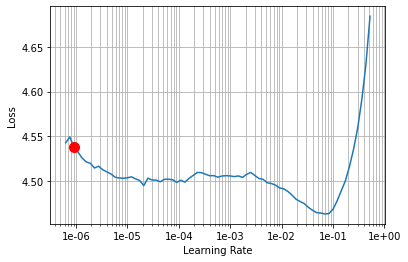

In [0]:
lm_learner.recorder.plot(skip_end=15,suggestion=True,show_grid=True,show_moms=True)

In [0]:
lm_learner.fit_one_cycle(3,slice(7e-03,7e-02))

epoch,train_loss,valid_loss,accuracy,time
0,5.231069,4.777180,0.243623,13:14
1,4.927618,4.502458,0.257212,13:15
2,4.543940,4.165444,0.280953,13:17


In [0]:
lm_learner.export("ted_model.pkl")